<a href="https://colab.research.google.com/github/hanumantmule/Email_Classification/blob/main/Spam_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix
#for oversampling minority class
from imblearn.over_sampling import SMOTE

data = pd.read_csv('/content/spam_ham_dataset.csv')
data.head()

sample = data.sample(5)
for i in range(5):
    print('Class: ', sample.iloc[i]['label'])
    print('Email:')
    print(sample.iloc[i]['text'])
    print('\n', '---'*45)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Class:  ham
Email:
Subject: hgpl and kgpl - 3 rivers gas
based on the conversation we had at the meeting last thursday , i am
implementing the following changes to humble gas pipeline and king ranch gas
plant . if you disagree or feel you had a different understanding than the
items below , please be sure to call me asap .
1 . input hplc purchase from hplr liquids at meter 8793 ( hpl / hgpl ) . remove
the 3 rivers gas from the interconnect ticket and input on
the purchase deal .
2 . input hplc sale to hplr liquids at meters 9643 ( kgpl / hpl ) and 12
( kgpl / hgpl ) . remove 3 rivers volumes from the interconnect tickets
at these meters and input on the sales deals appropriately .
3 . change swing parameters for the king ranch contracts to swing on cage
ranch 

In [ ]:
#drop the ID column
data.drop('Unnamed: 0', axis = 1, inplace = True)


0    71.01141
1    28.98859
Name: label_num, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


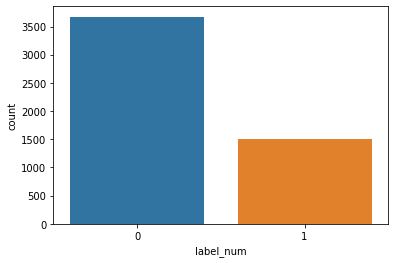

In [ ]:
print(data['label_num'].value_counts()/sum(data['label_num'].value_counts())*100)
sns.countplot('label_num', data = data)


In [ ]:
stopwords_set = set(stopwords.words('english'))
#Save the 'not'
#stopwords_set.remove('not')
#add subject to stopwords
stopwords_set.add('subject')
stopwords_set.add('http')
def preprocessing_text(x):
    import string
    #lower case
    x = x.lower()
    #remove number
    x = re.sub(r'\d+','',x)
    #remove punctuation
    x = re.sub(r'[^\w\s]', '',x)
    #remove leading and ending space
    x = x.strip()
    #remove stopword
    x = ' '.join([word for word in word_tokenize(x) if not word in stopwords_set])
    return x
#apply preprocessing text on text
data['text'] = data['text'].apply(lambda x: preprocessing_text(x))

In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

Spam email wordcloud


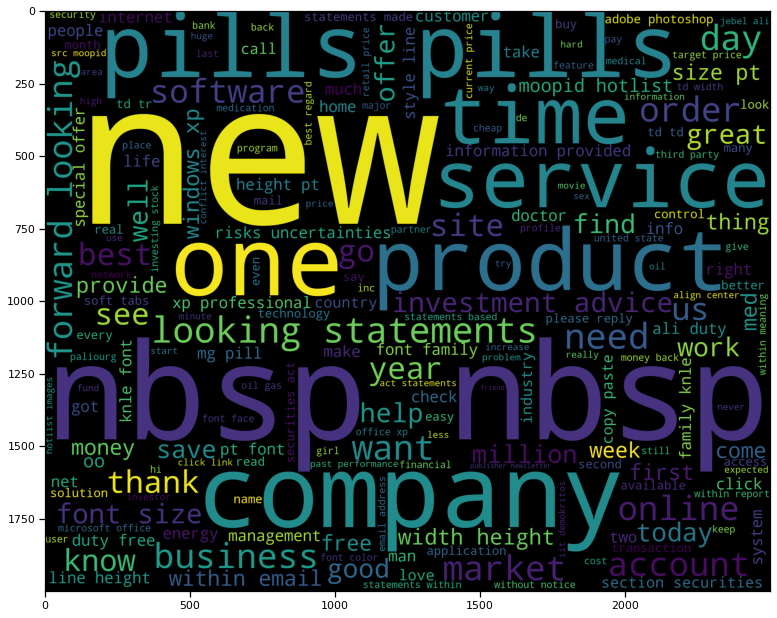

Ham email wordcloud


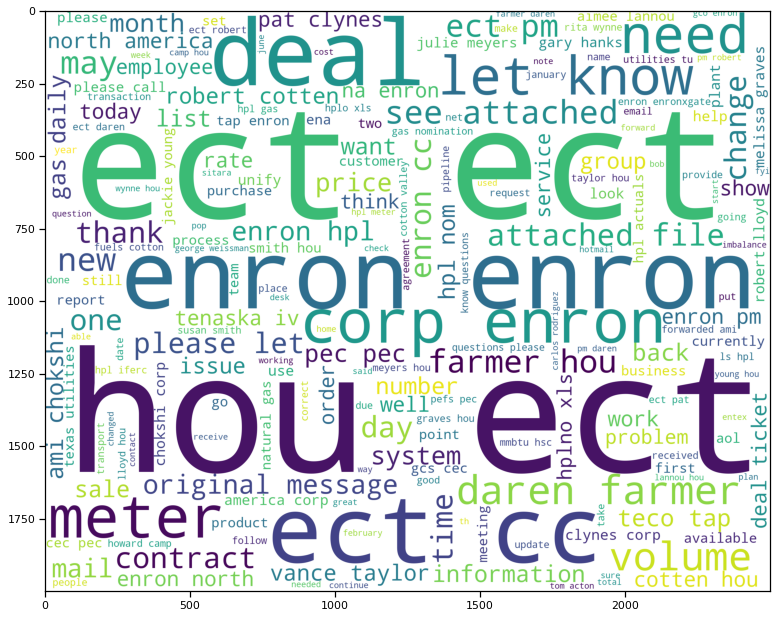

In [ ]:
#draw wordcloud
from wordcloud import WordCloud
sns.set(style = None)
train_spam = train[train['label_num'] == 1]
train_spam = train_spam['text']
#turn series to string by join ' ' to it
train_spam = ' '.join(train_spam)
train_ham = train[train['label_num'] == 0]
train_ham = train_ham['text']
train_ham = ' '.join(train_ham)
wordcloud_spam = WordCloud(background_color = 'black', width = 2500, height = 2000 ).generate(train_spam)
plt.figure(figsize = (13,13))
print('Spam email wordcloud')
plt.imshow(wordcloud_spam)
plt.show()
wordcloud_ham = WordCloud(background_color = 'white', width = 2500, height = 2000).generate(train_ham)
print('Ham email wordcloud')
plt.figure(figsize = (13,13))

plt.imshow(wordcloud_ham)
plt.show()